# Author : Praful M. Gedam
# Data Analytics And Business Analytics Intern

# Task 5 :- Exploratory Data Analysis - Sports

# Dataset:- https://bit.ly/34SRn3b

## Import required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
deliveries= pd.read_csv('/content/drive/MyDrive/Praful/deliveries.csv', encoding='latin-1')
matches= pd.read_csv('/content/drive/MyDrive/Praful/matches.csv', encoding='latin-1')

In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Information of Match dataset

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
# check null vales of dataset
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
# check statistical data
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Exploratory Data Analysis

In [11]:
matches['id'].max()

11415

In [12]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

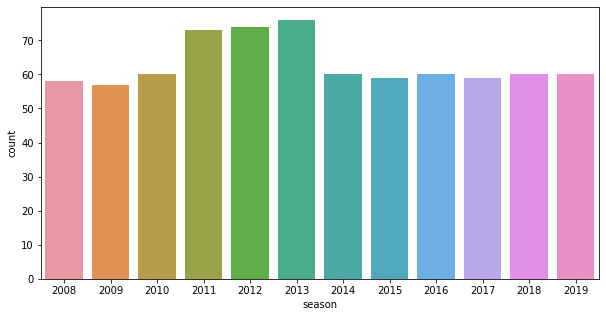

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=matches)
plt.show()

### Here we can see in year 2011, 2012, 2013 has more number of matches is played. Count is more than 70 matches.

### Number of wins per team

In [14]:
matches.winner.value_counts()  # here we find Number of wins per team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

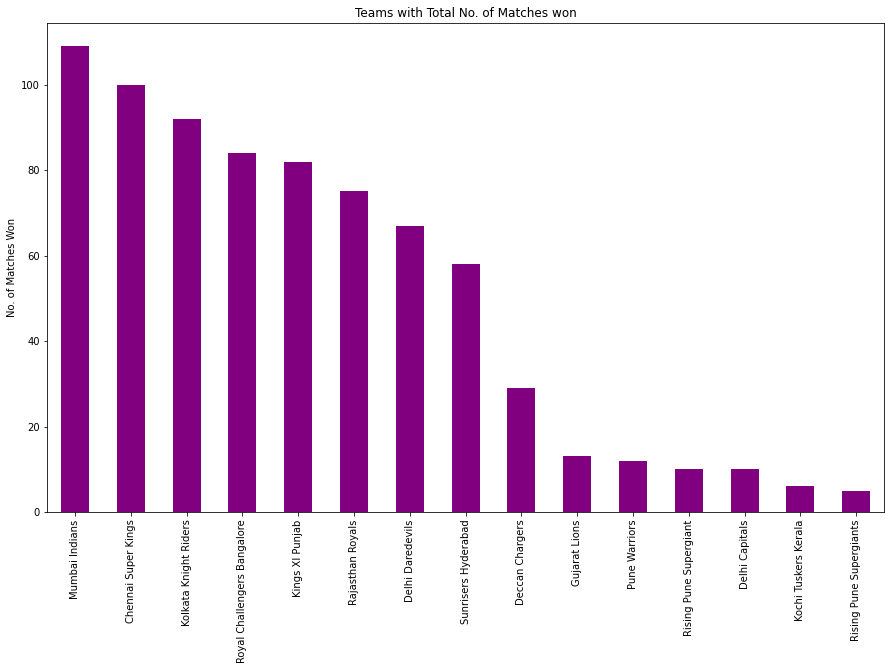

In [15]:
# see visualization
plt.figure(figsize=[15,9])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
matches.winner.value_counts().plot(kind='bar', color='purple')

### "Mumbai Indians wins more matches followed by Chennai Super Kings.

## Check champions in each season

In [16]:
matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Check which stadium more matches are played

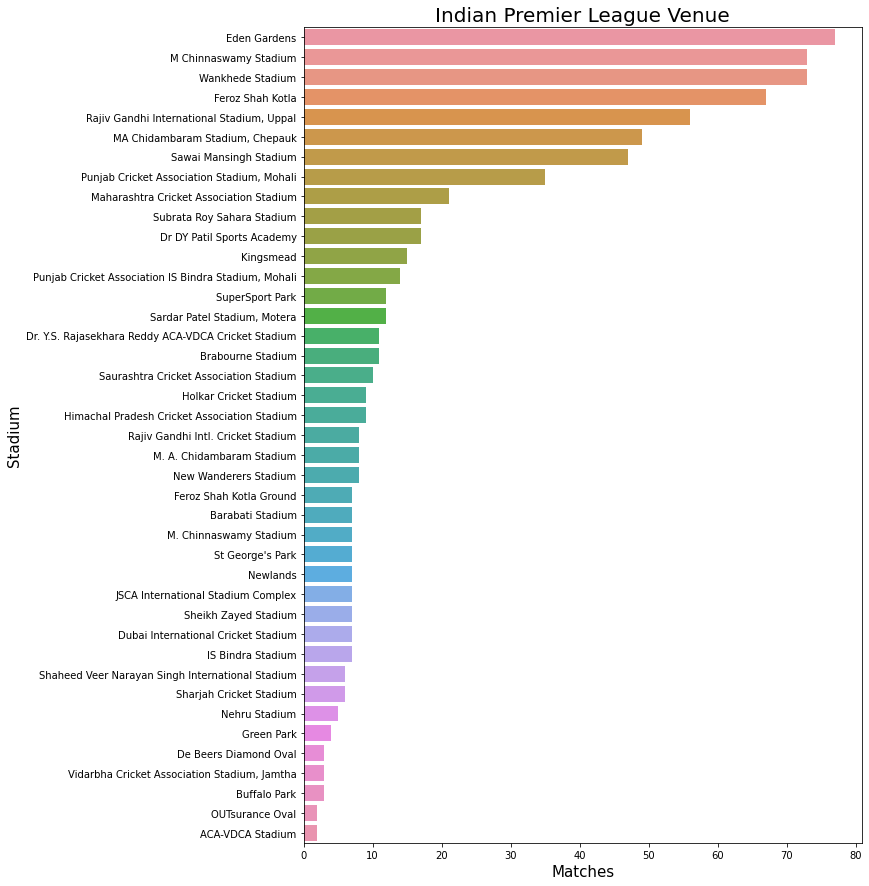

In [17]:
plt.subplots(figsize=(10,15))

sns.countplot(y ='venue',data=matches,order=matches['venue'].value_counts().index)

plt.title('Indian Premier League Venue',fontsize=20)
plt.xlabel('Matches',fontsize=15)
plt.ylabel('Stadium',fontsize=15)
plt.yticks(rotation=0,fontsize=10)
plt.show()

<BarContainer object of 2 artists>

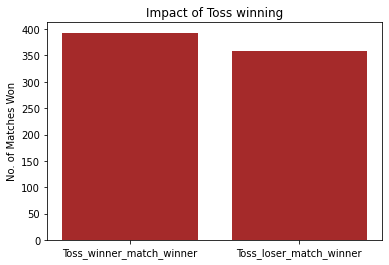

In [28]:
plt.title('Impact of Toss winning')
plt.ylabel('No. of Matches Won')
result = ['Toss_winner_match_winner', 'Toss_loser_match_winner']
count = [matches[matches.toss_winner == matches.winner].winner.count(), matches[matches.toss_winner != matches.winner].winner.count()]
plt.bar(result, count, color='brown')

Above chart is used to show the impact of winning a toss over winning a match.

 From results, it is clear that winning a toss alone does not greatly affect the result of a match as the difference between matches won by winning the toss and by loosing the toss is only 34.

<BarContainer object of 2 artists>

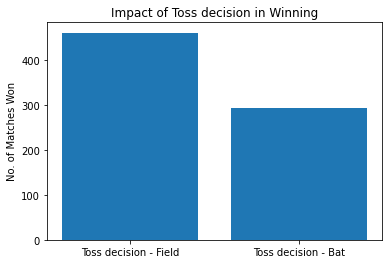

In [30]:
plt.title('Impact of Toss decision in Winning')
plt.ylabel('No. of Matches Won')
result1 = ['Toss decision - Field', 'Toss decision - Bat']
count1 = [matches[matches.toss_decision == 'field'].winner.count(), matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1)

Above chart is used to show the impact of toss decision over winning a match.

From results, it is clear that teams that choose to field first has higher chance of winning the match than the teams choosing to bat first.

### Now we can check win % of batting second.

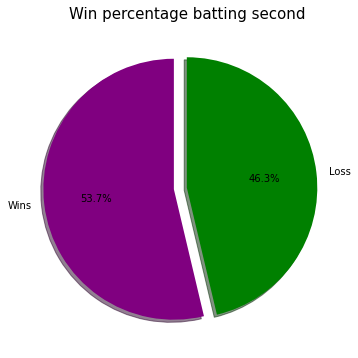

In [33]:
num_of_wins = (matches.win_by_wickets>0).sum()               # 406  Win 
num_of_loss = (matches.win_by_wickets==0).sum()              # 350  loss
labels = ["Wins", "Loss"] 
total = float(num_of_wins + num_of_loss)                      #  756 total 
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]    # [53.7%, 46.3% ]

colors = ['purple', 'green']                                     # color selection
explode = (0.1, 0)
plt.figure(figsize=(12,6))

# use pie plot 
plt.pie(sizes, labels=labels, explode=explode, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Win percentage batting second", fontsize=15)
plt.show()

Here We can see 53.7% of win when batting second.

## Check win of batting second distributedby years.

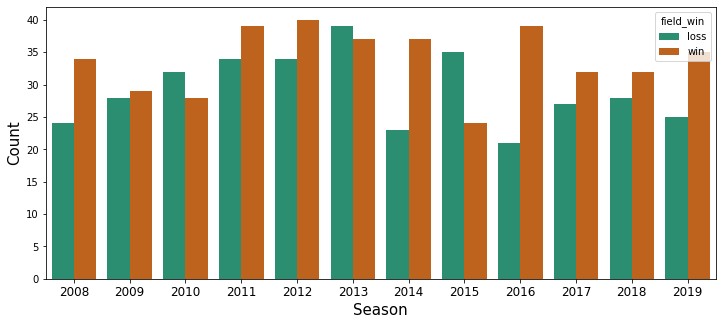

In [34]:
matches["field_win"] = "win"
matches["field_win"].iloc[matches['win_by_wickets']==0] = "loss"

plt.figure(figsize=(12,5))
sns.countplot(x='season', hue='field_win', data=matches, palette='Dark2' )

plt.xticks(rotation=0, fontsize= 12)
plt.xlabel("Season", fontsize= 15)
plt.ylabel("Count", fontsize= 15)

plt.show()

## Here we can see Number of wins batting second is also high

### Now we check toss winner is match winner

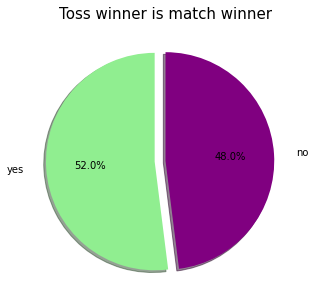

In [47]:
matches['toss_winner_is_winner'] = 'no'
matches['toss_winner_is_winner'].iloc[matches.toss_winner == matches.winner] = 'yes'

temp_series = matches.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['lightgreen', 'purple']
explode = (0.1, 0)
plt.figure(figsize=(10,5))

#use pie plot
plt.pie(sizes, labels=labels, colors=colors, explode = explode, autopct='%1.1f%%', 
        shadow=True, startangle=90, labeldistance=1.2)
plt.title("Toss winner is match winner", fontsize=15)

plt.show()

Above pie plot shows the chance is winning of team is near about 50-50 %.

### Check Toss winning team is a winning team or not.

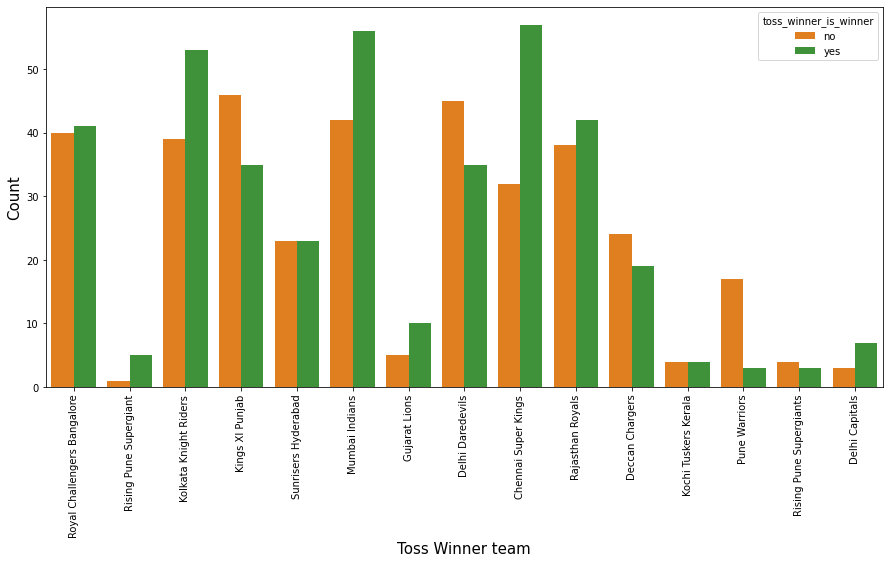

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=matches, palette="Paired_r")

plt.xticks(rotation=90, fontsize= 10 )
plt.xlabel("Toss Winner team", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.show()

# **Deliveries data**

In [52]:
deliveries.shape      # check shape of dataset

(179078, 21)

In [54]:
deliveries.info()     # get summeries of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [56]:
deliveries.describe()  # get statistical summaries of dataset

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Exploratory data analysis

### Batsman Analysis

In [57]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

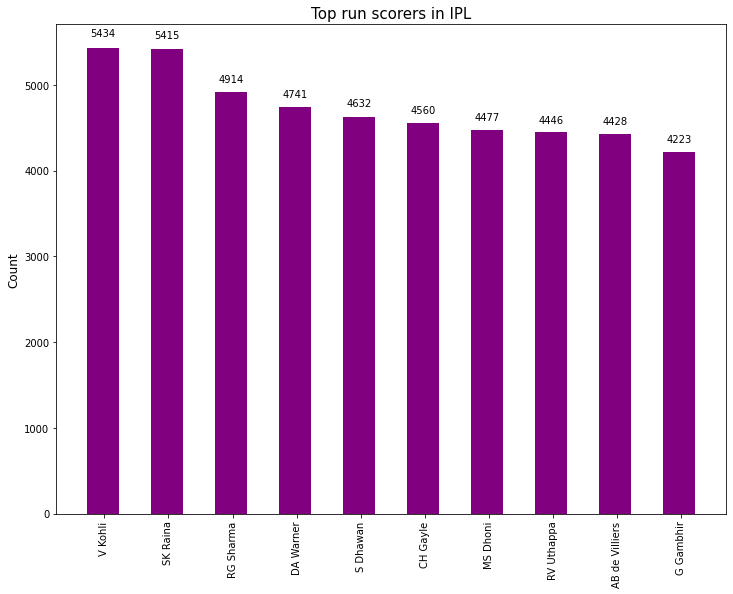

In [61]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])      # name of players
ind = np.arange(len(labels))               #index
width = 0.5
fig, ax = plt.subplots(figsize=(12,9))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='purple')

ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize = 12)
ax.set_title("Top run scorers in IPL", fontsize = 15)
autolabel(rects)
plt.show()

Virat Kohli is leading the chart followed closely by Raina. Gayle is the top scorer among foreign players.

## Now let us check the number of 6's

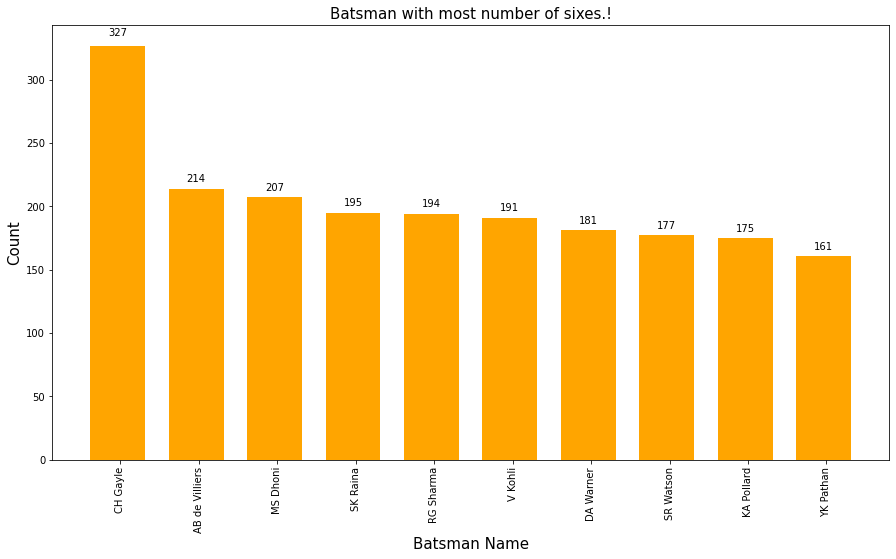

In [64]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/20.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize= 15)
ax.set_title("Batsman with most number of sixes.!", fontsize= 15)
ax.set_xlabel('Batsman Name', fontsize= 15)
autolabel(rects)
plt.show()

## CH Gayle is a leder in sixes

### Bowler Analysis:

## Now let us see the bowlers who has bowled most number of balls in IPL.

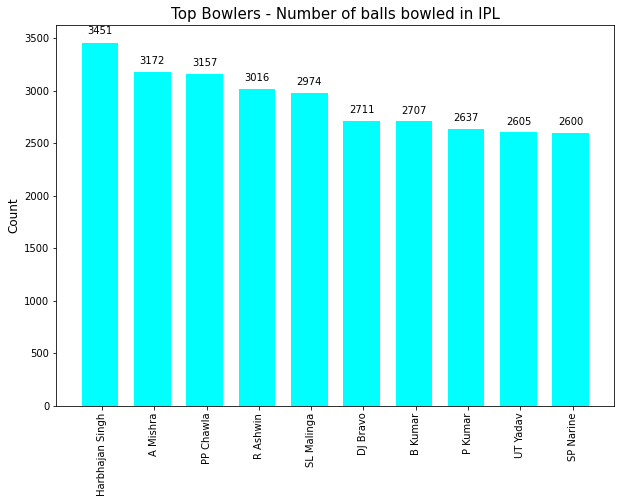

In [65]:
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Top Bowlers - Number of balls bowled in IPL", fontsize=15)
autolabel(rects)
plt.show()

## Harbhajan Singh has bowled most number of balls in IPL.

### Now let us see the bowler with more number of dot balls.

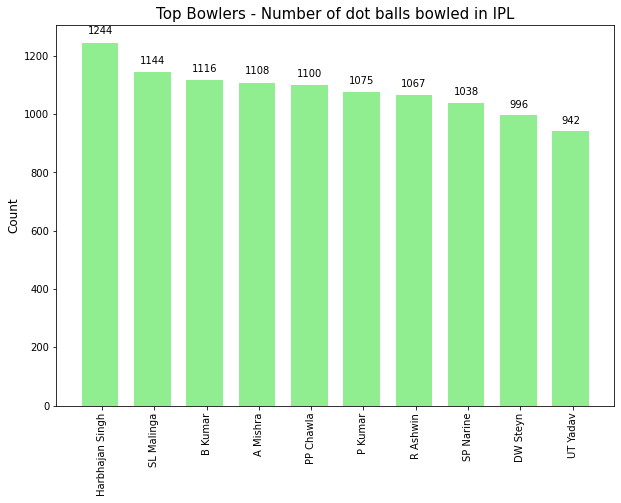

In [67]:
temp_df = deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightgreen')
ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL", fontsize=15)
autolabel(rects)
plt.show()

## Harbhajan Singh has bowled most number of Dot balls in IPL.

### Let us see the bowlers who has bowled more number of extras in IPL.

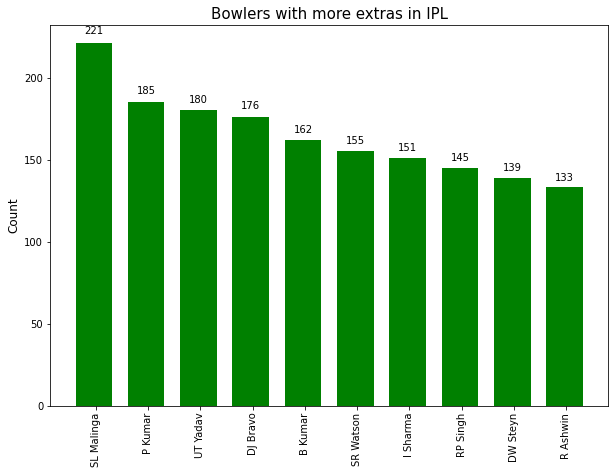

In [69]:
temp_df = deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/20))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Bowlers with more extras in IPL", fontsize=15)
autolabel(rects)
plt.show()


## SL Malinga bowled more extras in IPL

## Some Findings from Matches dataset




* **Mumbai Indians** plays the highest amount of matches and has won more seasons
than the other teams.

* **Chennai Super Kings** ranked the second highest in winning matches followed by Kolkata Knight Riders.

* **Eden Gardens**   hosts the highest number of matches followed by M Chinnaswamy Stadium and Wankhede Stadium.

* **CH Gayle** won the most MVP awards in Indian Premier League

## Some findings from Score dataset

* **Virat Kohli** has Top run score in IPL followed closely by Raina & Gayle is the top scorer among foreign players.

* **S.Dhawan** has more boundries than others and CH Gayle is a leder in sixes.

* **Harbhajan Singh** has bowled most number of balls as weel as Dot balls in IPL and SL Malinga bowled more extras in IPL

* **Caught** is the most common dismissal type in IPL followed by Bowled.
Thank you !

# **Thank You**